In [1]:
"""
Jupyter notebook containing example of drowning-out crystallization.
Methodology developed by 'Molecular Design Lab' of Korea University is used.
"""

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from cosmosac2 import COSMOMolecule, COSMOSAC
from ternary_calculate import TernaryCalculate as tc

In [3]:
# Create first system
system1 = tc()
system1.add_solute(457, 32945, file="./cosmo_file/UD618.cosmo", name="SUCCINIC_ACID")
system1.add_solvent(184.552, 9372.16, file="./cosmo_file/UD34.cosmo", name="1-BUTANOL")
system1.add_antisolvent(177.84, 13079, file="./cosmo_file/UD74.cosmo", name="N-HEXANE")

# Get ternary calculation data
ternary_data = system1.calculate(ngrid=101, trace=False)

In [4]:
# Create second system
system2 = tc()
system2.add_solute(457, 32945, file="./cosmo_file/UD618.cosmo", name="SUCCINIC_ACID")
system2.add_solvent(184.552, 9372.16, file="./cosmo_file/UD34.cosmo", name="1-BUTANOL")
system2.add_antisolvent(175.3, 3180, file="./cosmo_file/UD89.cosmo", name="METHANOL")

# Get ternary calculation data
ternary_data2 = system2.calculate(ngrid=101, trace=False)

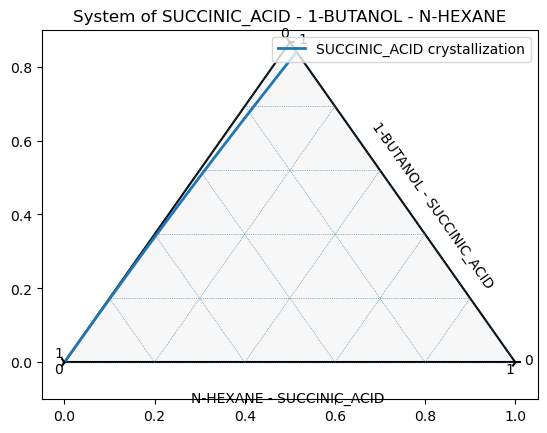

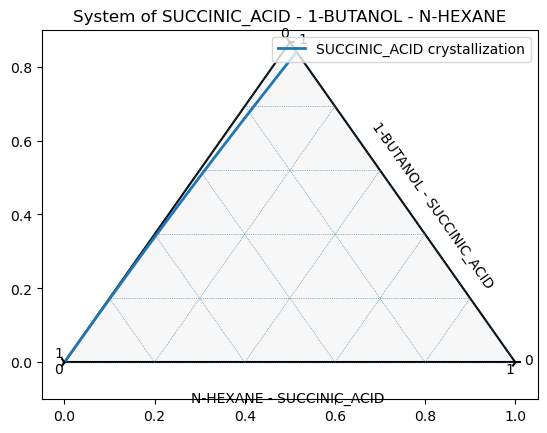

In [5]:
system1.plot_ternary(ternary_data)

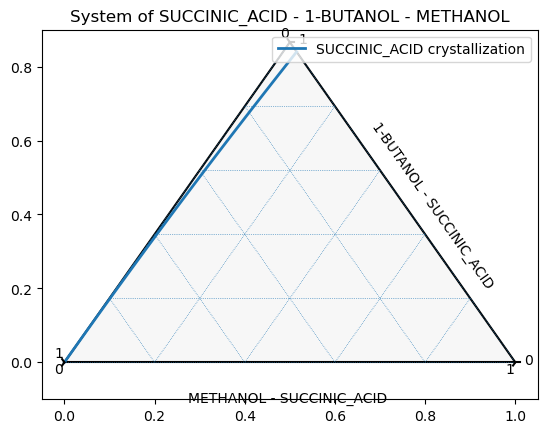

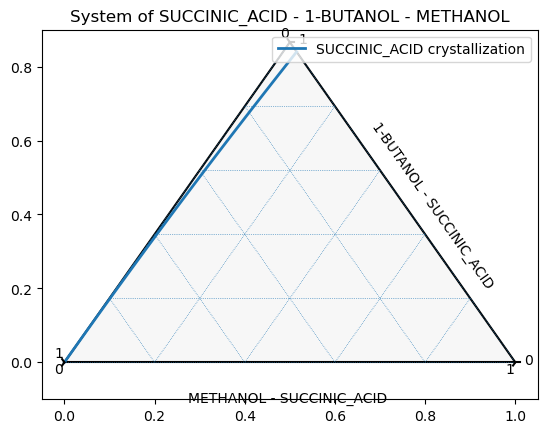

In [6]:
system2.plot_ternary(ternary_data)

In [7]:
# Get solute-solvent mole fraction
init_mole_frac = ternary_data[0, :]
# Get solute-antisolvent mole fraction
last_mole_frac = ternary_data[-1, :]

# Get the needed ratio
# Notice first and last rows are droped due to 'division by zero'.
capacity_ratio = ternary_data[1:-1, 0] / ternary_data[1:-1, 1]  # (ngrid - 2, 1)
antisolv_ratio = ternary_data[1:-1, 2] / ternary_data[1:-1, 1]  # (ngrid - 2, 1)

In [8]:
# Get solute-solvent mole fraction
init_mole_frac2 = ternary_data2[0, :]
# Get solute-antisolvent mole fraction
last_mole_frac2 = ternary_data2[-1, :]

# Get the needed ratio
# Notice first and last rows are droped due to 'division by zero'.
capacity_ratio2 = ternary_data2[1:-1, 0] / ternary_data2[1:-1, 1]  # (ngrid - 2, 1)
antisolv_ratio2 = ternary_data2[1:-1, 2] / ternary_data2[1:-1, 1]  # (ngrid - 2, 1)

In [9]:
# Define basis of calculation
calc_basis_mole = 1  # [mol]
# Calculate the mole amount of antisolvent to add based on the ratio
add_antisolv_mole = (
    calc_basis_mole * init_mole_frac[1] * antisolv_ratio
)  # (ngrid - 2, 1)

In [10]:
# Define basis of calculation
calc_basis_mole2 = 1  # [mol]
# Calculate the mole amount of antisolvent to add based on the ratio
add_antisolv_mole2 = (
    calc_basis_mole2 * init_mole_frac2[1] * antisolv_ratio2
)  # (ngrid - 2, 1)

In [11]:
# Calculate the capactiy of dissolved solute in solvent
# based on the capacity ratio
capactiy_mole = calc_basis_mole * init_mole_frac[1] * capacity_ratio  # (ngrid - 2, 1)

In [12]:
# Calculate the capactiy of dissolved solute in solvent
# based on the capacity ratio
capactiy_mole2 = (
    calc_basis_mole2 * init_mole_frac2[1] * capacity_ratio2
)  # (ngrid - 2, 1)

In [13]:
# Calculate amount of precipitation
precip_mole = calc_basis_mole * init_mole_frac[0] - capactiy_mole  # (ngrid - 2, 1)

In [14]:
# Calculate amount of precipitation
precip_mole2 = calc_basis_mole2 * init_mole_frac2[0] - capactiy_mole2  # (ngrid - 2, 1)

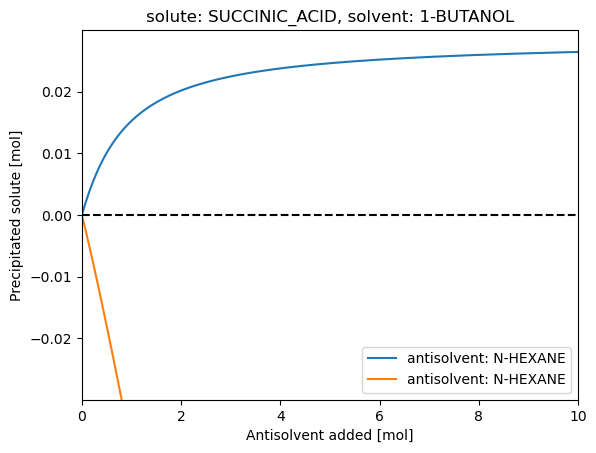

In [15]:
# Plot the solubility difference (i.e., amount of precipitation)
fig2 = plt.figure()
plt.plot(add_antisolv_mole, precip_mole, label=f"antisolvent: {system1.mole_name[2]}")
plt.plot(add_antisolv_mole2, precip_mole2, label=f"antisolvent: {system1.mole_name[2]}")
plt.hlines(0, 0, 100, colors="black", linestyles="dashed")
plt.title(f"solute: {system1.mole_name[0]}, solvent: {system1.mole_name[1]}")
# plt.xlim([0, add_antisolv_mole[-1]])
plt.xlim([0, 10])
plt.ylim([-calc_basis_mole * init_mole_frac[0], calc_basis_mole * init_mole_frac[0]])
plt.xlabel("Antisolvent added [mol]")
plt.ylabel("Precipitated solute [mol]")
plt.legend()